In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
def convert(df):
    df = df.map({
        'negative': 0,
        'neutral': 1,
        'positive': 2
    })
    return df

In [3]:
df_train = pd.read_csv('/kaggle/input/vietnamese-synthetic-with-embedding/synthetic_train.csv')
df_test = pd.read_csv('/kaggle/input/vietnamese-synthetic-with-embedding/synthetic_val.csv')

df_train['sentiment'] = convert(df_train['sentiment'])
df_test['sentiment'] = convert(df_test['sentiment'])

In [4]:
df_train

,sentence,sentiment,topic,Embedding
0,Đội ngũ bảo trì quá thưa thớt dẫn đến không đả...,0,facility,[ 2.19982073e-01 3.63517612e-01 -4.61064667e-...
1,The university's musical and artistic faciliti...,1,facility,[-6.98556229e-02 3.13316107e-01 -6.41901970e-...
2,Phương pháp giảng dạy phù hợp với các đối tượn...,1,curriculum,[ 3.66974548e-02 -1.62254930e-01 -4.80269253e-...
3,Chương trình học giúp tôi trở thành một chuyên...,2,curriculum,[ 2.30636820e-01 2.10734963e-01 -4.55003142e-...
4,Tôi nghĩ rằng chương trình đào tạo có thể có t...,1,curriculum,[ 2.79438913e-01 3.65758181e-01 -7.15621054e-...
...,...,...,...,...
8139,Hệ thống an ninh trong trường rất tốt và đảm b...,1,facility,[ 1.30174056e-01 2.53454953e-01 -3.22597384e-...
8140,Cô giáo đã giúp tôi hiểu rõ hơn về môn học này.,1,others,[ 3.46620709e-01 -1.32109657e-01 -4.93672311e-...
8141,Anh/chị đã trở thành một người bạn đồng hành v...,2,others,[ 2.67296940e-01 -1.49599472e-02 -5.56336522e-...
8142,Chương trình học phù hợp với nhu cầu của các n...,1,curriculum,[-1.13419928e-01 2.67758429e-01 -2.57066309e-...


In [5]:
def parse_embedding_string(s):
    # Bỏ dấu ngoặc vuông và split theo khoảng trắng
    return np.array([float(x) for x in s.strip("[]").split()])

# Áp dụng vào cột
X_train = np.vstack(df_train['Embedding'].apply(parse_embedding_string))
X_test = np.vstack(df_test['Embedding'].apply(parse_embedding_string))

y_train = df_train['sentiment']
y_test = df_test['sentiment']

In [6]:
def plot_cm(model, y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    labels = model.classes_
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_rf(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plot_cm(model, y_test, y_pred, 'RandomForestClassifier')
    return model


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       686
           1       0.75      0.69      0.72       670
           2       0.76      0.76      0.76       680

    accuracy                           0.81      2036
   macro avg       0.80      0.81      0.81      2036
weighted avg       0.80      0.81      0.81      2036



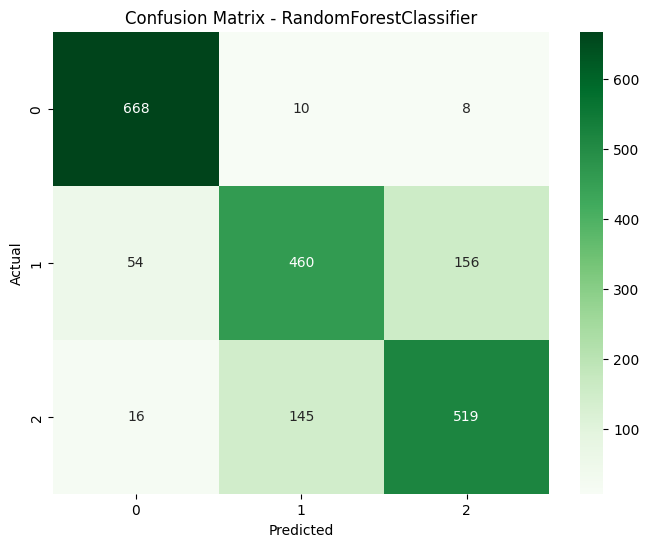

In [8]:
rf_model = train_rf(X_train, X_test, y_train, y_test)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def train_svm(X_train, X_test, y_train, y_test):
    model = SVC(kernel='linear', probability=True, random_state=42)  # Có thể đổi kernel
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plot_cm(model, y_test, y_pred, 'SVM')
    return model


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       686
           1       0.77      0.74      0.75       670
           2       0.78      0.80      0.79       680

    accuracy                           0.84      2036
   macro avg       0.84      0.84      0.84      2036
weighted avg       0.84      0.84      0.84      2036



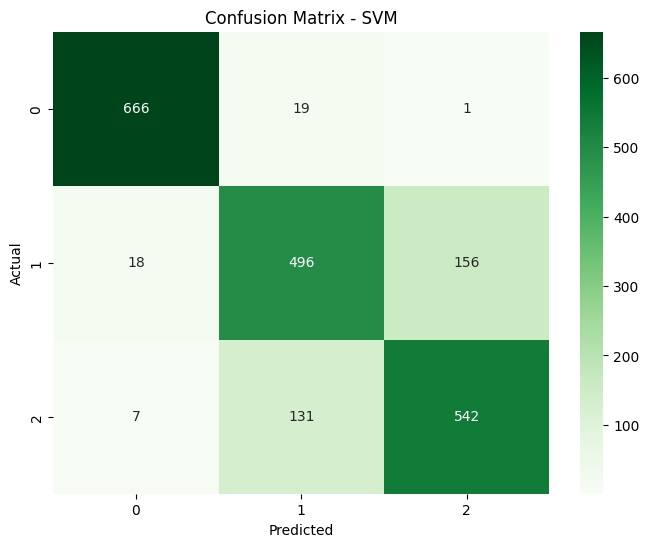

In [10]:
svm_model = train_svm(X_train, X_test, y_train, y_test)

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_xgboost(X_train, X_test, y_train, y_test):
    num_classes = len(set(y_train))  # Số lớp

    model = XGBClassifier(
        objective='multi:softprob',
        num_class=num_classes,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    plot_cm(model, y_test, y_pred, 'XGBoost')
    return model


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       686
           1       0.77      0.75      0.76       670
           2       0.79      0.79      0.79       680

    accuracy                           0.84      2036
   macro avg       0.84      0.84      0.84      2036
weighted avg       0.84      0.84      0.84      2036



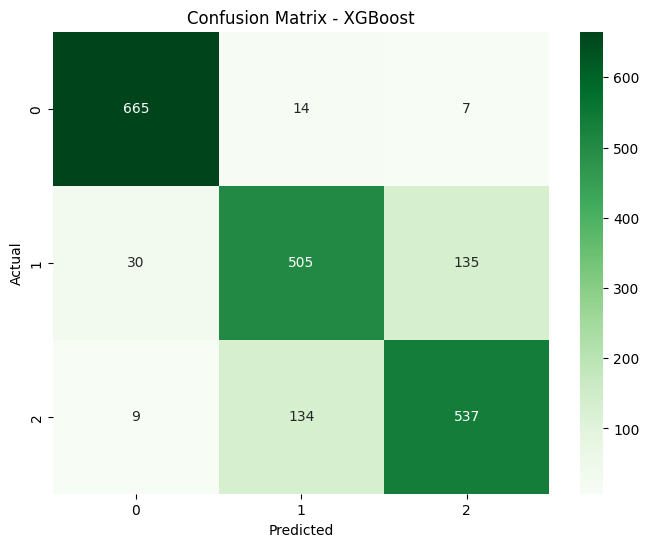

In [12]:
xgb_model = train_xgboost(X_train, X_test, y_train, y_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_nn(X_train, X_test, y_train, y_test, num_classes):
    # Xây dựng mô hình
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # softmax cho multi-class classification

    # Compile mô hình
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  # Nếu y là số nguyên (0,1,2..)
                  metrics=['accuracy'])

    # Huấn luyện mô hình
    history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

    # Dự đoán
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)

    # Đánh giá
    print("Accuracy:", accuracy_score(y_test, y_pred_classes))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    labels = list(range(num_classes))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Neural Network')
    plt.show()

    return model


2025-04-29 00:41:29.531631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745887289.775254      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745887289.840576      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-29 00:41:44.244506: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6630 - loss: 0.6744 - val_accuracy: 0.8301 - val_loss: 0.3969
Epoch 2/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7948 - loss: 0.4138 - val_accuracy: 0.8178 - val_loss: 0.4232
Epoch 3/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8104 - loss: 0.3874 - val_accuracy: 0.8423 - val_loss: 0.3548
Epoch 4/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8208 - loss: 0.3654 - val_accuracy: 0.8227 - val_loss: 0.3968
Epoch 5/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8280 - loss: 0.3526 - val_accuracy: 0.7996 - val_loss: 0.3900
Epoch 6/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8419 - loss: 0.3266 - val_accuracy: 0.8340 - val_loss: 0.3636
Epoch 7/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8466 - loss: 0.3225 - val_accuracy: 0.8163 - val_loss: 0.4308
Epoch 8/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8510 - loss: 0.3132 - val_accuracy: 0.

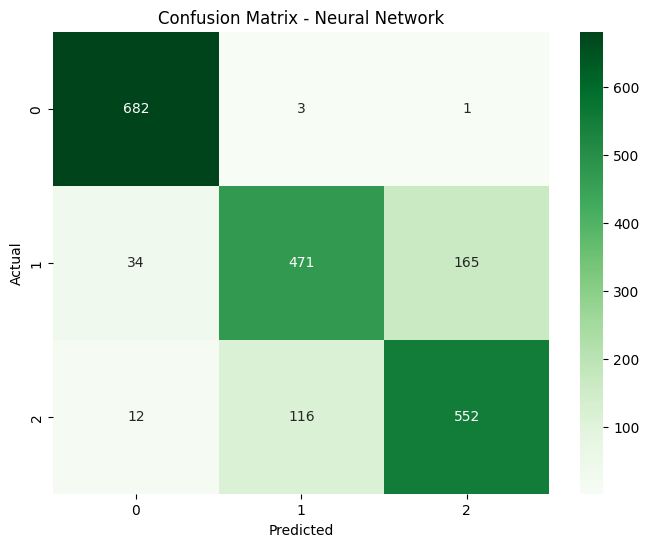

In [14]:
NN_model = train_nn(X_train, X_test, y_train, y_test, len(y_train.unique()))